In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# **Завантаження попередньо підготовлених датасетів**

In [2]:
path_users = './data/Normalized_dataset_users.csv'
path_features = './data/Normalized_dataset_features.csv'
path_user_profiles = './data/User_Profiles.csv'
path_user_profiles_KMEANS = './data/User_Profiles_clusterized.csv'
path_user_profiles_Hierarchical = './data/User_Profiles_hierarchical_clusterized.csv'

In [3]:
df_users = pd.read_csv(path_users, on_bad_lines='skip')
df_users.shape

(9711301, 4)

In [4]:
df_features = pd.read_csv(path_features, on_bad_lines='skip')
df_features.shape

(50683, 18)

In [5]:
df_profiles = pd.read_csv(path_user_profiles, on_bad_lines='skip', index_col='Unnamed: 0')
df_profiles.shape

(1000, 12)

In [6]:
df_profiles.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
113cc950a5e433abe82419e7c3bc200d0d1ccae7,0.631047,0.67109,0.467842,0.817875,0.632653,0.068877,0.292139,0.237843,0.189414,0.572529,0.545303,0.786395


In [7]:
df_profiles_clustered_kmeans = pd.read_csv(path_user_profiles_KMEANS, on_bad_lines='skip', index_col='user_id')
df_profiles_clustered_kmeans.shape

(1000, 13)

In [8]:
df_profiles_clustered_kmeans.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster_k_5
user_id,,,,,,,,,,,,,
55255e63745e103829a8c5b2d39c63871d536905,0.554556,0.640075,0.439683,0.78109,0.594005,0.067933,0.240959,0.348333,0.187882,0.436952,0.530002,0.776022,4


In [9]:
df_profiles_clustered_kmeans.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'cluster']

In [10]:
df_profiles_clustered_kmeans.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'cluster'],
      dtype='object')

In [11]:
df_profiles_clustered_hierarchical = pd.read_csv(path_user_profiles_Hierarchical, on_bad_lines='skip', index_col='user_id')
df_profiles_clustered_hierarchical.shape

(1000, 13)

In [12]:
df_profiles_clustered_hierarchical.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
user_id,,,,,,,,,,,,,
82d0dee10848c44f8944baac8cb12efe776d445c,0.498759,0.677699,0.451687,0.821481,0.769392,0.05121,0.230974,0.105885,0.198003,0.454621,0.519788,0.783648,1


In [13]:
df_profiles_clustered_hierarchical.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'cluster'],
      dtype='object')

### **Оберемо випадкового користувача**

In [14]:
df_users.groupby('user_id').count().sort_values(by='track_id', ascending=False)

,track_id,playcount,playcount_norm
user_id,,,
ec6dfcf19485cb011e0b22637075037aae34cf26,784,784,784
4e11f45d732f4861772b2906f81a7d384552ad12,384,384,384
726da71c2c2ea119119a7957517fccd028d1be76,376,376,376
113255a012b2affeab62607563d03fbdf31b08e7,367,367,367
7adec7f006cb09482d36609d205293d8b61f030e,366,366,366
...,...,...,...
c736e87d6a5193662b776136067a7e104f970fbb,1,1,1
3d3750d24e0200ab74aee8f3a11f9c7778f22d4d,1,1,1
c737a8a65917262b5ff3289242f83929277554a1,1,1,1


Візьмемо користувача з id '726da71c2c2ea119119a7957517fccd028d1be76', оскільки він має багато даних про прослуховування.

In [15]:
random_user_id = '726da71c2c2ea119119a7957517fccd028d1be76'
random_user = df_profiles[df_profiles.index == random_user_id]
random_user

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
726da71c2c2ea119119a7957517fccd028d1be76,0.534128,0.686606,0.484437,0.820491,0.711957,0.06595,0.207395,0.2059,0.200038,0.49707,0.522242,0.779348


In [16]:
random_user_kmeans = df_profiles_clustered_kmeans[df_profiles_clustered_kmeans.index == random_user_id]
random_user_kmeans

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
user_id,,,,,,,,,,,,,
726da71c2c2ea119119a7957517fccd028d1be76,0.534128,0.686606,0.484437,0.820491,0.711957,0.06595,0.207395,0.2059,0.200038,0.49707,0.522242,0.779348,3


In [17]:
random_user_hierarchical = df_profiles_clustered_hierarchical[df_profiles_clustered_hierarchical.index == random_user_id]
random_user_hierarchical

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
user_id,,,,,,,,,,,,,
726da71c2c2ea119119a7957517fccd028d1be76,0.534128,0.686606,0.484437,0.820491,0.711957,0.06595,0.207395,0.2059,0.200038,0.49707,0.522242,0.779348,1


In [18]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']

# **Рекомендації базовані на контенті**

In [19]:
def get_content_based_recommendations(user_profile, tracks_df, features):
  def manhattan_distance(user_profile, track_row):
    user_profile = np.asarray(user_profile)
    track_row = np.asarray(track_row)
    return np.sum(np.abs(user_profile - track_row))

  df = tracks_df[features]
  return df.apply(lambda track: manhattan_distance(user_profile.iloc[0].astype(float), track.astype(float)), axis=1)

In [20]:
df_users = df_users.merge(df_profiles_clustered_kmeans['cluster'], left_on='user_id', right_index=True)

In [21]:
df_users.sample()

,track_id,user_id,playcount,playcount_norm,cluster
5457151,TRLDUCS128F14979BF,138d73356c23e6e12aa82fb5dc9225428c196464,1,0.0,3


In [22]:
df_users.columns = ['track_id', 'user_id', 'playcount', 'playcount_norm', 'kmeans_cluster']

In [23]:
df_users = df_users.merge(df_profiles_clustered_hierarchical['cluster'], left_on='user_id', right_index=True)

In [24]:
df_users.columns = ['track_id', 'user_id', 'playcount', 'playcount_norm', 'kmeans_cluster', 'hierarchical_cluster']

In [25]:
unique_users = df_profiles.index.values
np.random.shuffle(unique_users)
unique_users = unique_users[:20]

In [26]:
recommendations = {}
for user in unique_users:
    random_user = df_profiles[df_profiles.index == user]
    if user not in recommendations:
        recommendations[user] = {}
    recommendations[user] = get_content_based_recommendations(random_user, 
                                                df_features, 
                                                features)

In [27]:
len(recommendations)

20

# **Рекомендації за допомогою колаборативної фільтрації**

In [35]:
def get_user_to_user_recommendations(user_track_matrix, user_df, user_id, limit):
    filtered_user_df = user_df[user_df['user_id'] == user_id]
    listened_tracks = filtered_user_df['track_id'].values

    user_matrix = user_track_matrix[user_track_matrix.index == user_id]
    not_zero_ratings = user_matrix.loc[:, (user_matrix != 0).all()]

    recommended_tracks = set(listened_tracks).symmetric_difference(not_zero_ratings.columns)
    filtered_user_row = not_zero_ratings[list(recommended_tracks)]
    top_recommendations = filtered_user_row.loc[:, filtered_user_row.loc[user_id].sort_values(ascending=False).head(limit).index]
    return top_recommendations

In [36]:
def get_features_of_recommended_tracks(recs, df_features):
    result = df_features.merge(recs.transpose(), on='track_id', how='inner')
    result.rename(columns={recs.index.values[0]: 'similarity'}, inplace=True)
    return result

In [37]:
path_matrix_zero = './data/filled_clustered/filled_kmeans_zero.csv'
path_matrix_one = './data/filled_clustered/filled_kmeans_one.csv'
path_matrix_two = './data/filled_clustered/filled_kmeans_two.csv'
path_matrix_three = './data/filled_clustered/filled_kmeans_three.csv'
path_matrix_four = './data/filled_clustered/filled_kmeans_four.csv'

In [39]:
df_filled_matrix_zero = pd.read_csv(path_matrix_zero, on_bad_lines='skip', index_col='user_id')
df_filled_matrix_one = pd.read_csv(path_matrix_one, on_bad_lines='skip', index_col='user_id')
df_filled_matrix_two = pd.read_csv(path_matrix_two, on_bad_lines='skip', index_col='user_id')
df_filled_matrix_three = pd.read_csv(path_matrix_three, on_bad_lines='skip', index_col='user_id')
df_filled_matrix_four = pd.read_csv(path_matrix_four, on_bad_lines='skip', index_col='user_id')

In [61]:
# df_filled_matrix_zero.columns.name = 'track_id'
# df_filled_matrix_one.columns.name = 'track_id'
# df_filled_matrix_two.columns.name = 'track_id'
# df_filled_matrix_three.columns.name = 'track_id'
df_filled_matrix_four.columns.name = 'track_id'

In [47]:
clusters = {
    0: df_filled_matrix_zero,
    1: df_filled_matrix_one,
    2: df_filled_matrix_two,
    3: df_filled_matrix_three,
    4: df_filled_matrix_four
}

In [43]:
df_users.columns

Index(['track_id', 'user_id', 'playcount', 'playcount_norm', 'kmeans_cluster',
       'hierarchical_cluster'],
      dtype='object')

In [62]:
recommendations_collaborative = {}
for user in unique_users:
    user_cluster = df_users[df_users['user_id'] == user]['kmeans_cluster'].values[0]
    user_track_matrix = clusters[user_cluster]
    user_track_matrix = user_track_matrix[user_track_matrix.index == user]
    recommendations_collaborative[user] = get_features_of_recommended_tracks(get_user_to_user_recommendations(
        user_track_matrix=user_track_matrix, user_df=df_users, user_id=user, limit = 20
    ), df_features)

In [65]:
len(recommendations_collaborative)

20

# **Вимірювання точності**

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [68]:
def simmilarity(user_profile, list_of_recs, features):
  recs = []
  df = list_of_recs[features]
  for col in df.columns:
    recs.append(df[col].median())
  return {
      'mae': mean_absolute_error(y_true=user_profile.T.values, y_pred=recs),
      'mse': mean_squared_error(y_true=user_profile.T.values, y_pred=recs),
      'rmse': root_mean_squared_error(y_true=user_profile.T.values, y_pred=recs)
  }

In [78]:
def get_error_measures(recommendations_cb, recommendations_col, user_id):
    user = df_profiles[df_profiles.index == user_id]
    error_measures = {}
    error_measures['collaborative'] = simmilarity(user, recommendations_col[user_id].sort_values(by='similarity', ascending=False).iloc[:20], features)
    error_measures['content-based'] = simmilarity(user, pd.concat([recommendations_cb[user_id], df_features], axis=1).sort_values(by=0, ascending=True).iloc[:20], features)

    return error_measures

In [79]:
error_measures = {}
for user in unique_users:
    error_measures[user] = get_error_measures(recommendations, recommendations_collaborative, user)

In [81]:
len(error_measures)

20

In [83]:
def get_min_metric(error_measures):
    min_metrics = {}
    for metric in ['mae', 'mse', 'rmse']:
        best = min(error_measures.items(), key=lambda item: item[1][metric])
        min_metrics[metric] = best[0]
    return min_metrics

In [84]:
min_metrics = {}
for user in unique_users:
    min_metrics[user] = get_min_metric(error_measures[user])

In [85]:
min_metrics_df = pd.DataFrame.from_dict(min_metrics, orient='index')
min_metrics_df.sample()

,mae,mse,rmse
34516b707f840a994a5c7876a6430d2a3b446eb4,content-based,content-based,content-based


In [86]:
min_metrics_df['mae'].unique(), min_metrics_df['mse'].unique(), min_metrics_df['rmse'].unique()

(array(['content-based'], dtype=object),
 array(['content-based', 'collaborative'], dtype=object),
 array(['content-based', 'collaborative'], dtype=object))

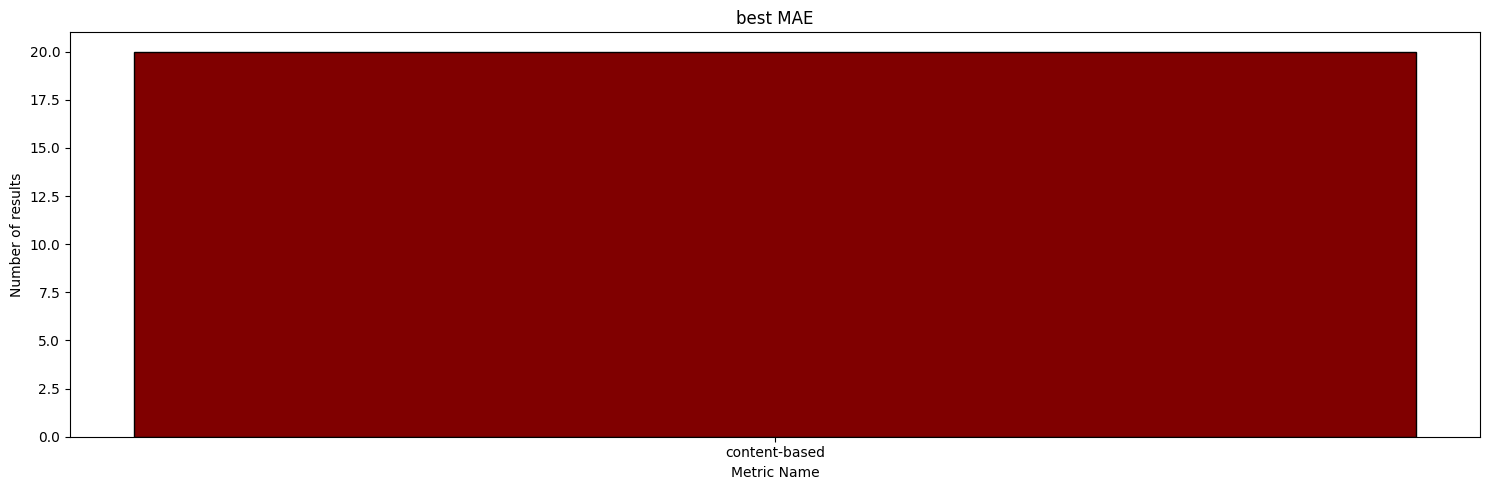

In [87]:
plt.figure(figsize=(15, 5))
plt.bar(x=min_metrics_df['mae'].unique(), height=min_metrics_df['mae'].value_counts(), color='maroon', edgecolor='black')
plt.title('best MAE')
plt.xlabel('Metric Name')
plt.ylabel('Number of results')
plt.tight_layout()
plt.show()

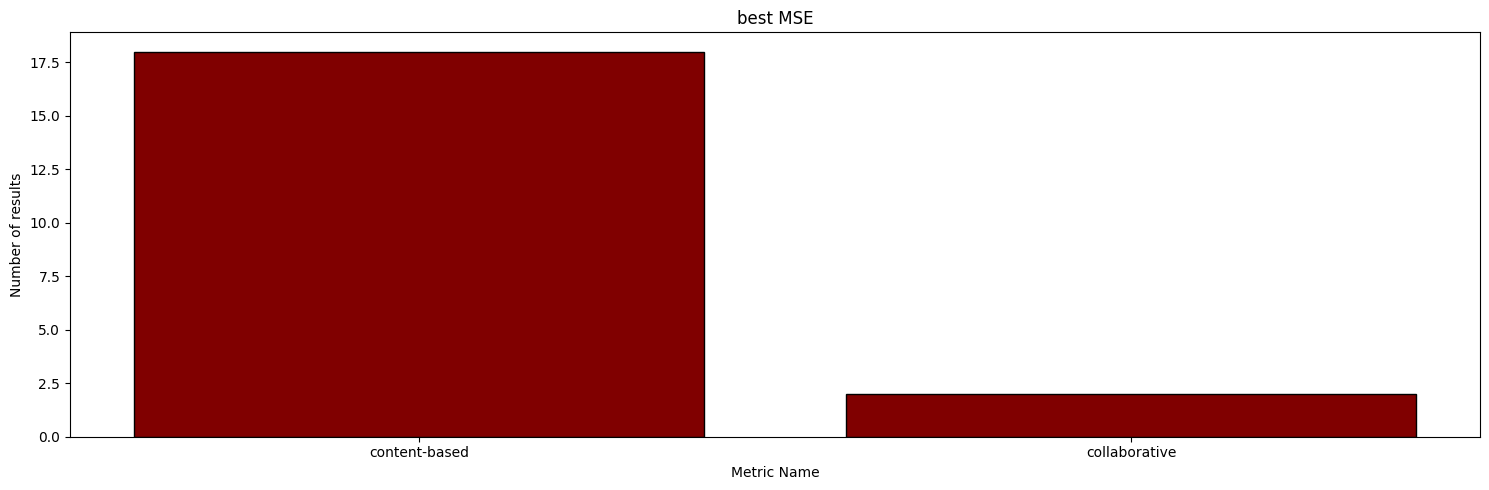

In [88]:
plt.figure(figsize=(15, 5))
plt.bar(x=min_metrics_df['mse'].unique(), height=min_metrics_df['mse'].value_counts(), color='maroon', edgecolor='black')
plt.title('best MSE')
plt.xlabel('Metric Name')
plt.ylabel('Number of results')
plt.tight_layout()
plt.show()

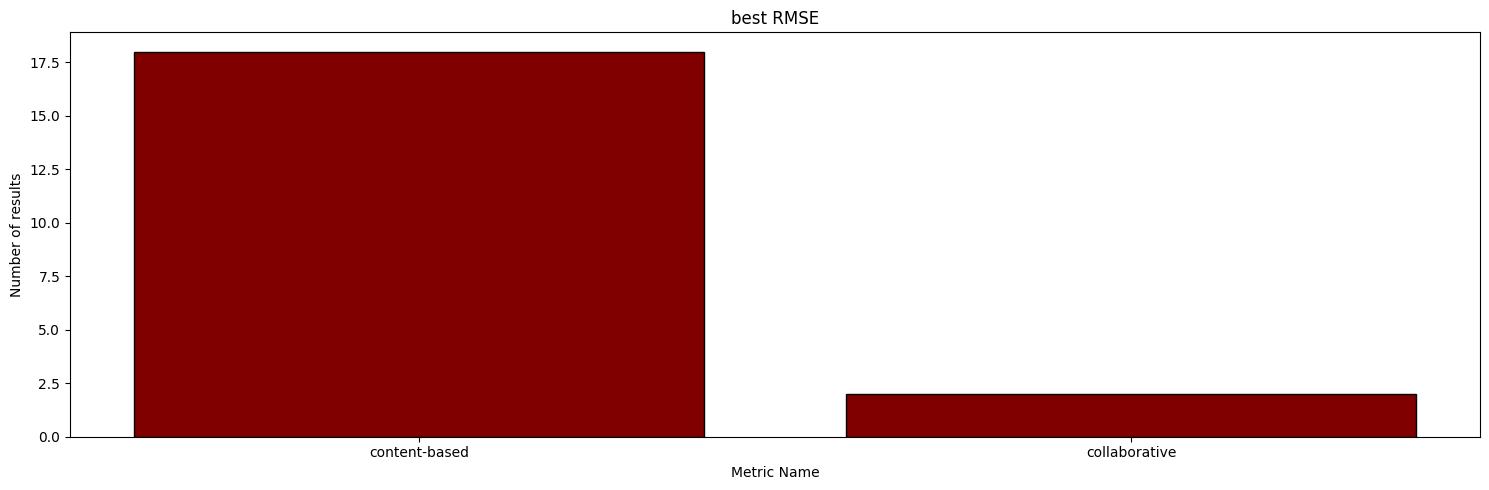

In [89]:
plt.figure(figsize=(15, 5))
plt.bar(x=min_metrics_df['rmse'].unique(), height=min_metrics_df['rmse'].value_counts(), color='maroon', edgecolor='black')
plt.title('best RMSE')
plt.xlabel('Metric Name')
plt.ylabel('Number of results')
plt.tight_layout()
plt.show()

# **Візуалізація рекомендацій для кількох користувачів**

In [90]:
def plot_user_recommendation(users: pd.DataFrame, features: list, user_profile: pd.DataFrame = None):
    num_features = len(features)

    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
    angles = np.append(angles, angles[0])

    values_up = ''
    if user_profile is not None and not user_profile.empty:
        values_up = user_profile[features].values
        values_up = np.append(values_up[0], values_up[0][0])


    rows = (users.shape[0] + 4) // 5
    fig, axs = plt.subplots(rows, 5, figsize=(25, 10 * (rows // 2)), subplot_kw={'projection': 'polar'}, layout='constrained')
    fig.suptitle('Visualization of User Recommendations', fontsize=16, fontweight='bold')

    for i, (index, user) in enumerate(users.iterrows()):
        row = i // 5
        col = i % 5

        values = user[features].values
        values = np.append(values, values[0])

        ax = axs[row, col]
        ax.fill(angles, values, color='maroon', alpha=0.25)
        ax.plot(angles, values, color='maroon', linewidth=2)

        if user_profile is not None and not user_profile.empty:
            ax.fill(angles, values_up, color='crimson', alpha=0.25)
            ax.plot(angles, values_up, color='crimson', linewidth=2)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(features, fontsize=8)
        ax.set_yticklabels([])
        ax.set_title(user['name'], size='medium', fontweight='bold')

    plt.show()

## **Візуалізація рекомендацій колаборативного підходу**

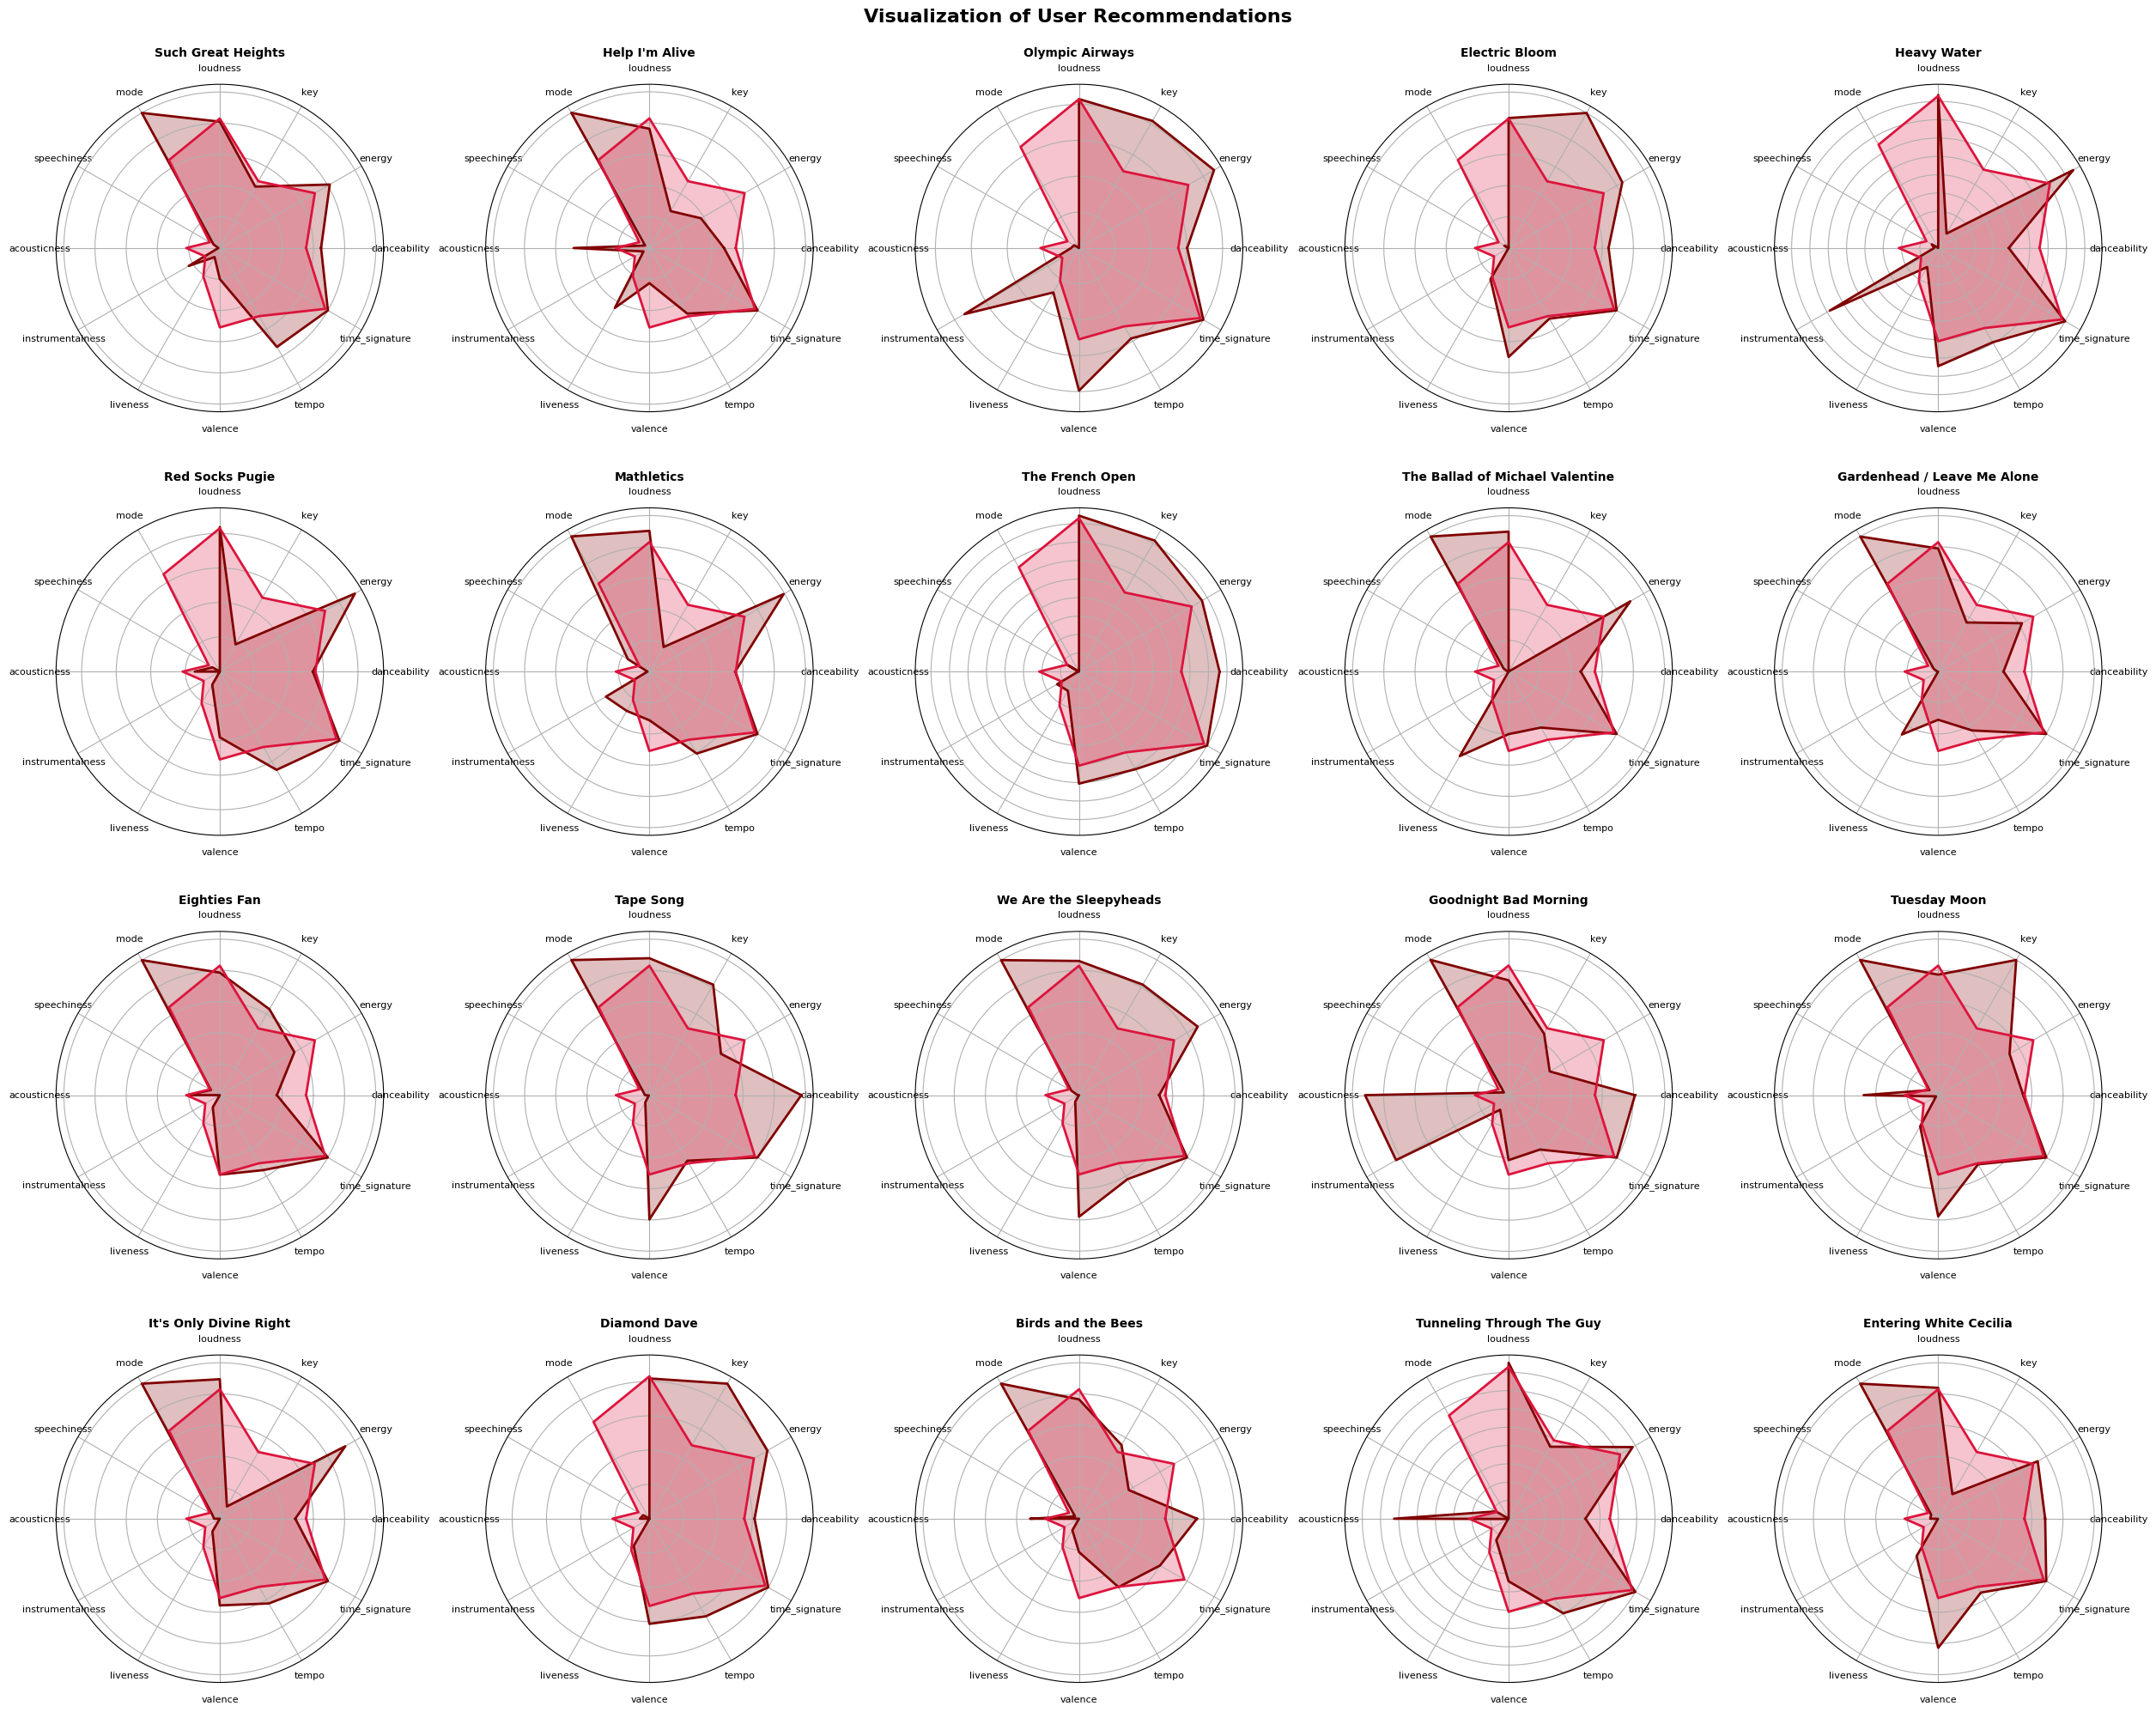

In [99]:
unique_user = unique_users[np.random.choice(unique_users.shape[0], 1, replace=False)][0]
plot_user_recommendation(users=recommendations_collaborative[unique_user], features=features, user_profile=df_profiles[df_profiles.index == unique_user])

## **Візуалізація рекомендацій content-based підходу**

In [108]:
cb_recommendations = pd.concat([df_features, recommendations[unique_user]], axis=1).sort_values(by=0).iloc[:20]

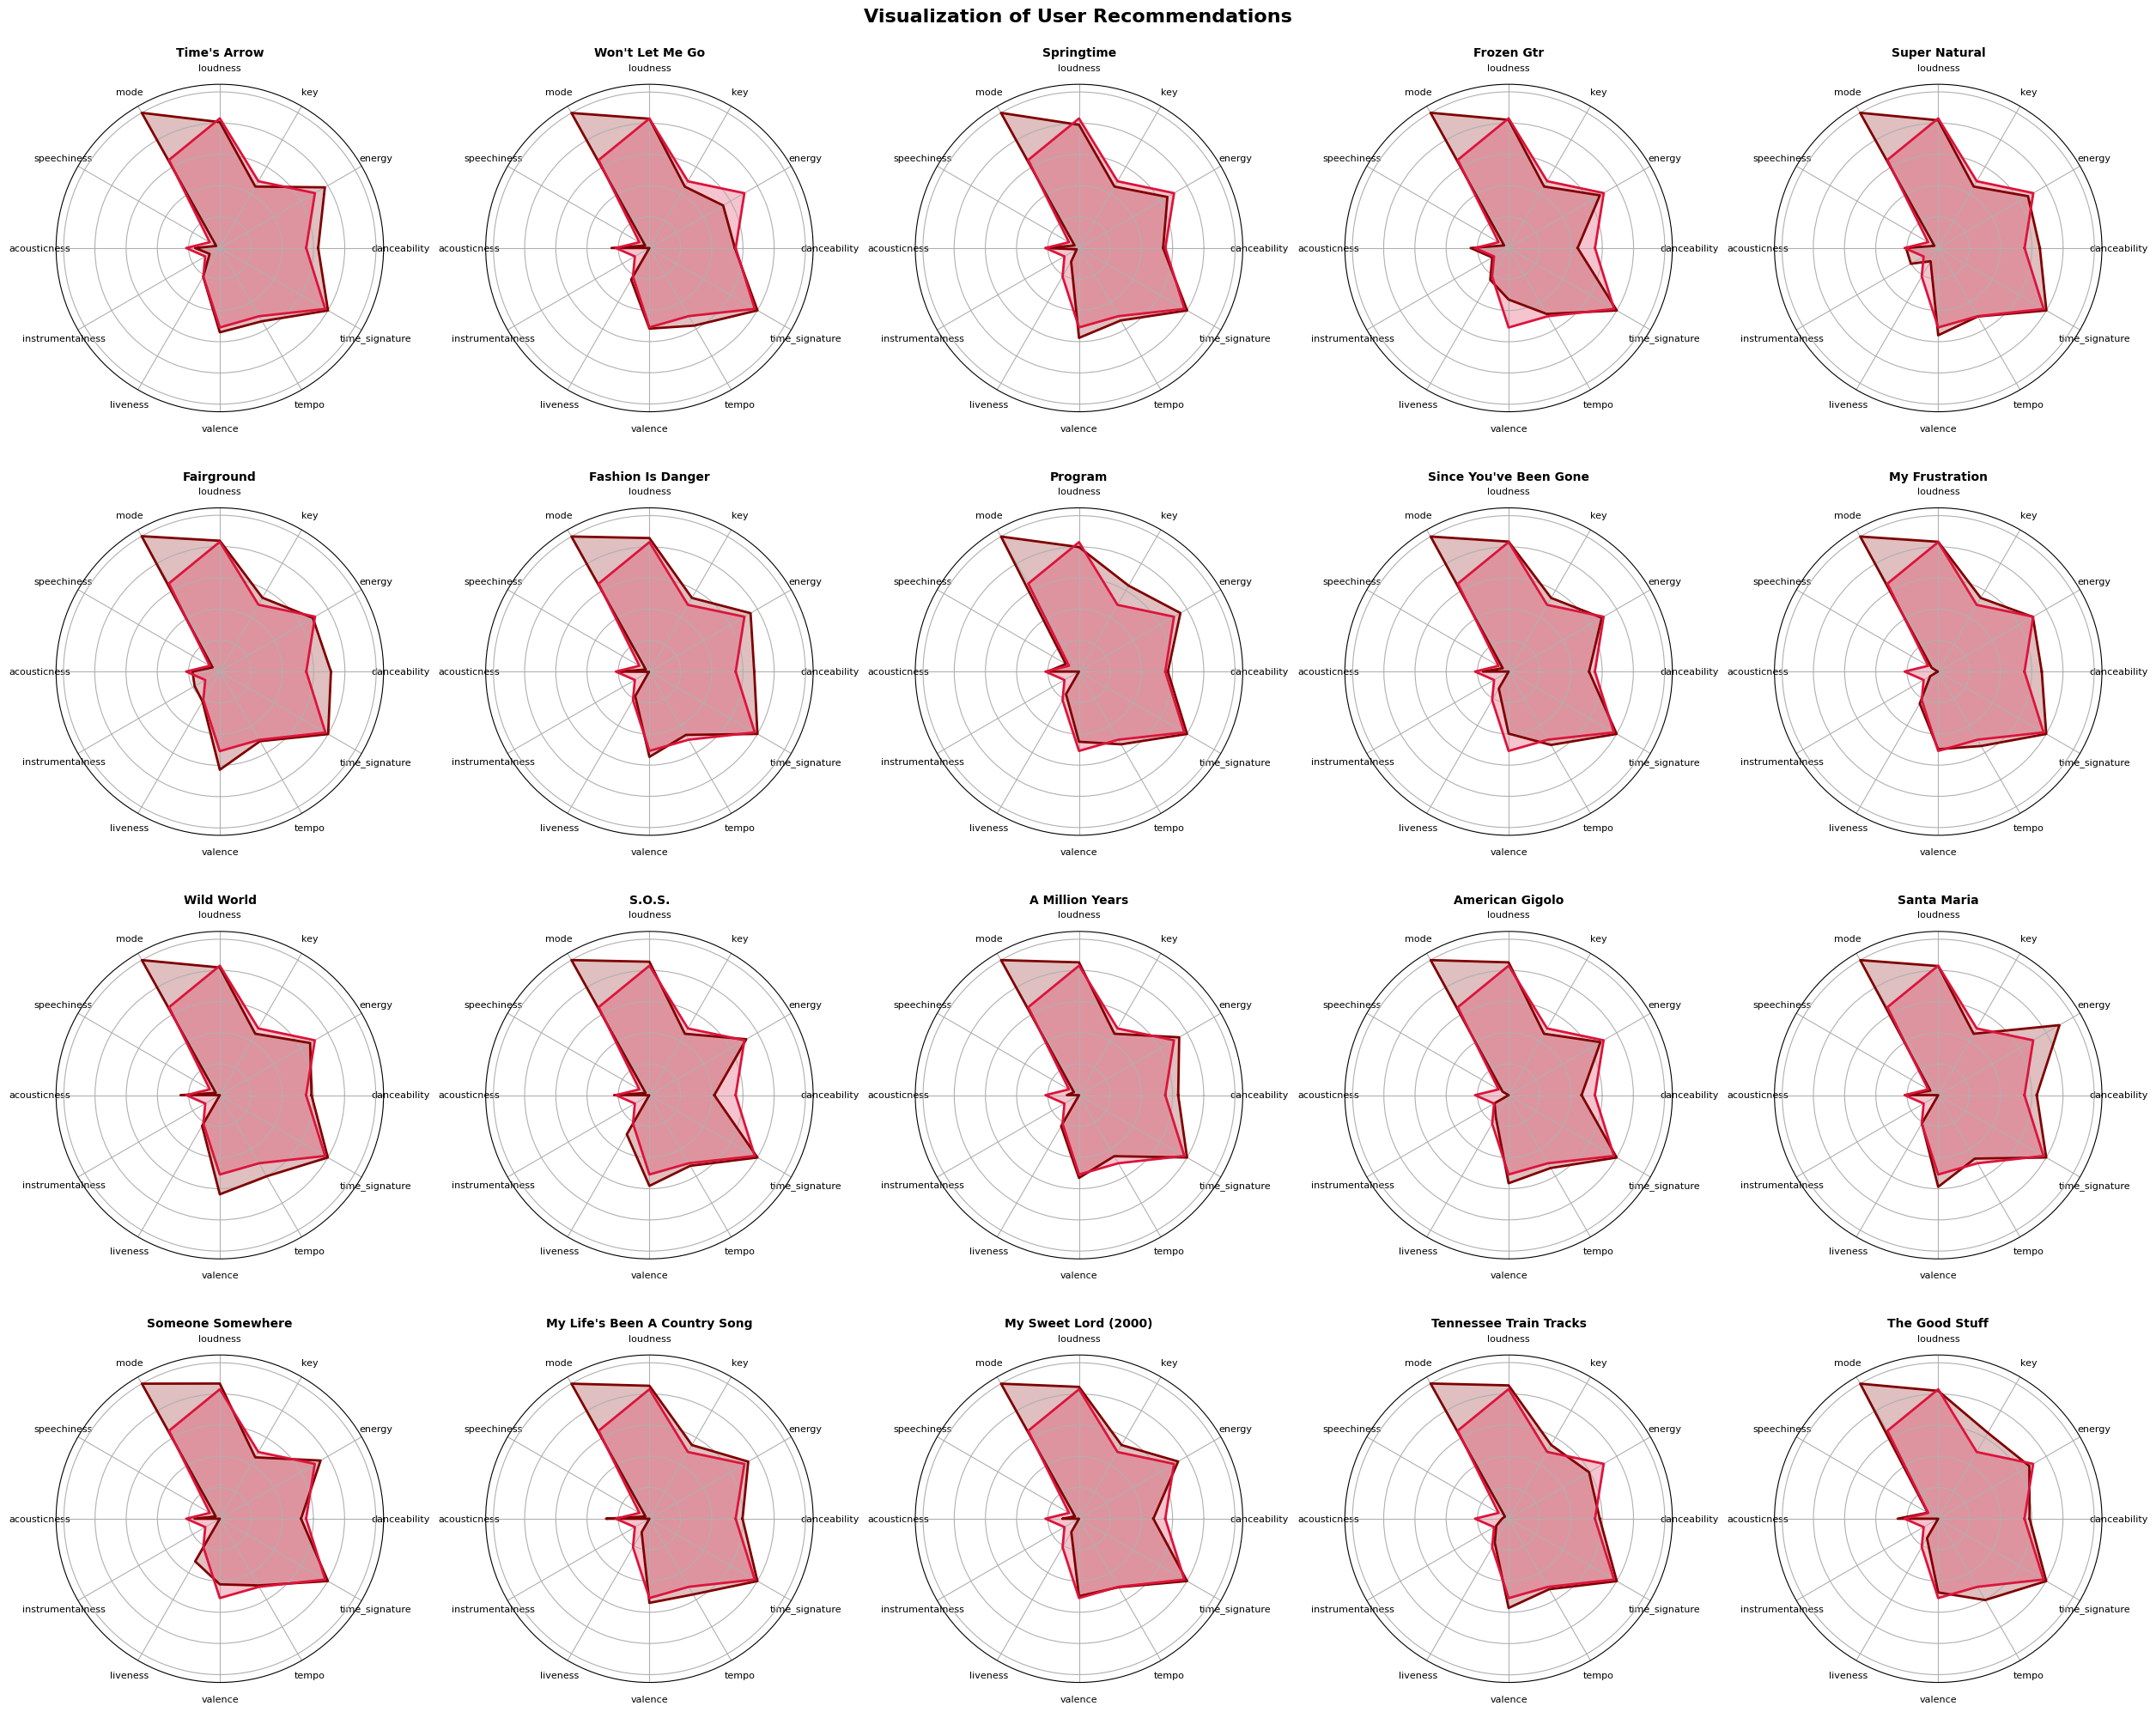

In [109]:
plot_user_recommendation(users=cb_recommendations, features=features, user_profile=df_profiles[df_profiles.index == unique_user])

## **Пошук схожих рекомендацій**

In [110]:
col_recs = recommendations_collaborative[unique_user]

In [111]:
from termcolor import colored, cprint

In [114]:
from functools import reduce

In [116]:
for user in unique_users:
    dfs = [    
        recommendations_collaborative[user],
        pd.concat([df_features, recommendations[user]], axis=1).sort_values(by=0).iloc[:20],
    ]
    n_sim = reduce(lambda left, right: pd.merge(left, right, how='inner'), dfs).shape
    print(colored(f'for user {user:<15} colaborative and content-based {n_sim}', 'red' if n_sim[0] == 0 else 'green'))

for user 9af92dd4349d57bd60506d6fc2c29c1bbeaf7400 colaborative and content-based (0, 20)
for user c37939ce312befa377e3c30ee8aac7e7c6f8d616 colaborative and content-based (0, 20)
for user 5a19589a9952cc49d3ae9ecfb013310a55e750a8 colaborative and content-based (0, 20)
for user 6b12ad78b6fe329bf03e8c8e9118280c673df867 colaborative and content-based (0, 20)
for user 990839cf42658790bb57023bb1a8fa32716ec76a colaborative and content-based (0, 20)
for user 4c27b4ba9422b379f1e62113dd32370c046cc6ce colaborative and content-based (0, 20)
for user 67fed0494bb75979a9a48399811712e6be3af1f1 colaborative and content-based (0, 20)
for user 921a20408dd11e9635c9083a118162ea12875aef colaborative and content-based (0, 20)
for user 0526c04451927596078e8d1f18be539e98402306 colaborative and content-based (0, 20)
for user fe9a05c03c29da973743a83b80d1660748077432 colaborative and content-based (0, 20)
for user 3c17608542f14181229cb289afabeeecea7bfed6 colaborative and content-based (0, 20)
for user a3f301c3ea0c

## **Перевіримо чи є співпадіння в рекомендаціях з тими треками, які користувач вже слухав**

### **collaborative**

In [117]:
for user in unique_users:
    user_tracks = df_users[df_users['user_id'] == user]
    user_tracks_ids = user_tracks['track_id']

    df = recommendations_collaborative[user]
    df_filtered = df[df['track_id'].isin(user_tracks_ids)]
    
    n_sim = df_filtered.shape
    print(colored(f'for user {user:<15} {n_sim}', 'red' if n_sim[0] == 0 else 'green'))

for user 9af92dd4349d57bd60506d6fc2c29c1bbeaf7400 (0, 19)
for user c37939ce312befa377e3c30ee8aac7e7c6f8d616 (0, 19)
for user 5a19589a9952cc49d3ae9ecfb013310a55e750a8 (0, 19)
for user 6b12ad78b6fe329bf03e8c8e9118280c673df867 (0, 19)
for user 990839cf42658790bb57023bb1a8fa32716ec76a (0, 19)
for user 4c27b4ba9422b379f1e62113dd32370c046cc6ce (0, 19)
for user 67fed0494bb75979a9a48399811712e6be3af1f1 (0, 19)
for user 921a20408dd11e9635c9083a118162ea12875aef (0, 19)
for user 0526c04451927596078e8d1f18be539e98402306 (0, 19)
for user fe9a05c03c29da973743a83b80d1660748077432 (0, 19)
for user 3c17608542f14181229cb289afabeeecea7bfed6 (0, 19)
for user a3f301c3ea0c7fbd9956c2418db7f05fb37d5bdb (0, 19)
for user feee315cf240084e21428c7ddc41bed4c10b3c26 (0, 19)
for user 117c61a87306f361c3451915d49fc6f58ca659e8 (0, 19)
for user 7ded96eda66f81b8bfd20e28c1efc28ed8993e61 (0, 19)
for user 2a2f776cbac6df64d6cb505e7e834e01684673b6 (0, 19)
for user 34516b707f840a994a5c7876a6430d2a3b446eb4 (0, 19)
for user c336e

### **content-based**

In [118]:
for user in unique_users:
    user_tracks = df_users[df_users['user_id'] == user]
    user_tracks_ids = user_tracks['track_id']

    df = pd.concat([df_features, recommendations[user]], axis=1).sort_values(by=0).iloc[:20]
    df_filtered = df[df['track_id'].isin(user_tracks_ids)]
    
    n_sim = df_filtered.shape
    print(colored(f'for user {user:<15} {n_sim}', 'red' if n_sim[0] == 0 else 'green'))

for user 9af92dd4349d57bd60506d6fc2c29c1bbeaf7400 (0, 19)
for user c37939ce312befa377e3c30ee8aac7e7c6f8d616 (0, 19)
for user 5a19589a9952cc49d3ae9ecfb013310a55e750a8 (0, 19)
for user 6b12ad78b6fe329bf03e8c8e9118280c673df867 (0, 19)
for user 990839cf42658790bb57023bb1a8fa32716ec76a (0, 19)
for user 4c27b4ba9422b379f1e62113dd32370c046cc6ce (1, 19)
for user 67fed0494bb75979a9a48399811712e6be3af1f1 (0, 19)
for user 921a20408dd11e9635c9083a118162ea12875aef (0, 19)
for user 0526c04451927596078e8d1f18be539e98402306 (0, 19)
for user fe9a05c03c29da973743a83b80d1660748077432 (0, 19)
for user 3c17608542f14181229cb289afabeeecea7bfed6 (0, 19)
for user a3f301c3ea0c7fbd9956c2418db7f05fb37d5bdb (0, 19)
for user feee315cf240084e21428c7ddc41bed4c10b3c26 (0, 19)
for user 117c61a87306f361c3451915d49fc6f58ca659e8 (0, 19)
for user 7ded96eda66f81b8bfd20e28c1efc28ed8993e61 (0, 19)
for user 2a2f776cbac6df64d6cb505e7e834e01684673b6 (0, 19)
for user 34516b707f840a994a5c7876a6430d2a3b446eb4 (0, 19)
for user c336e